In [1]:
# %% Importing
# System
import os
import sys

# Computing
import mne
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from surfer import Brain
from mayavi import mlab

__file__ = os.path.curdir
sys.path.append(os.path.join(os.path.dirname(__file__), '..', 'tools'))  # noqa
from MEG_worker import MEG_Worker
from visualizer import Visualizer
from inverse_solver import Inverse_Solver

In [ ]:
# %%
DO NOT RUN THIS UNLESS YOU WANT TO RECOMPUTE STC
stcs = dict()
stcs_baseline = dict()
for idx in range(1, 11):
    running_name = f'MEG_S{idx:02d}'
    band_name = 'U07'

    worker = MEG_Worker(running_name=running_name)
    worker.pipeline(band_name=band_name)

    # %%
    # epochs = worker.denoise_epochs['3']
    epochs = worker.clean_epochs
    epochs_baseline = worker.epochs['2']
    solver = Inverse_Solver(running_name=running_name)
    solver.pipeline(epochs=epochs,
                    raw_info=worker.raw.info)

    # %%
    stc, stc_fsaverage = solver.estimate(obj=epochs.average())
    stc, stc_fsaverage_baseline = solver.estimate(obj=epochs_baseline.average())
    
    stcs[running_name] = stc_fsaverage
    stcs_baseline[running_name] = stc_fsaverage_baseline
    
display(stcs)
display(stcs_baseline)

data = stc_fsaverage.data * 0
for running_name in stcs:
    data += stcs[running_name].data
stc_fsaverage.data = data / len(stcs)

data = stc_fsaverage_baseline.data * 0
for running_name in stcs_baseline:
    data += stcs_baseline[running_name].data
stc_fsaverage_baseline.data = data / len(stcs)

stc_fsaverage.save('stc_fsaverage')
stc_fsaverage_baseline.save('stc_fsaverage_baseline')

In [2]:
# %%
mne.viz.set_3d_backend('pyvista')

label_list_aparc = mne.read_labels_from_annot('fsaverage', 'aparc', 'both')
label_list_visuotopic = mne.read_labels_from_annot('fsaverage', 'PALS_B12_Visuotopic', 'both')

display(label_list_aparc)
display(label_list_visuotopic)

labels = dict()

for j, label in enumerate(label_list_visuotopic):
    if label.name.startswith('Visuotopic'):
        labels[label.name] = label
        
ROIs = ['fusiform',
        'temporal',
       ]
for j, label in enumerate(label_list_aparc):
    labels[label.name] = label
        

Using pyvista 3d backend.

Reading labels from parcellation...
   read 35 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/lh.aparc.annot
   read 34 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/rh.aparc.annot
Reading labels from parcellation...
   read 16 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/lh.PALS_B12_Visuotopic.annot
   read 27 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/rh.PALS_B12_Visuotopic.annot


[<Label  |  fsaverage, 'bankssts-lh', lh : 2137 vertices>,
 <Label  |  fsaverage, 'bankssts-rh', rh : 2196 vertices>,
 <Label  |  fsaverage, 'caudalanteriorcingulate-lh', lh : 1439 vertices>,
 <Label  |  fsaverage, 'caudalanteriorcingulate-rh', rh : 1608 vertices>,
 <Label  |  fsaverage, 'caudalmiddlefrontal-lh', lh : 3736 vertices>,
 <Label  |  fsaverage, 'caudalmiddlefrontal-rh', rh : 3494 vertices>,
 <Label  |  fsaverage, 'cuneus-lh', lh : 1630 vertices>,
 <Label  |  fsaverage, 'cuneus-rh', rh : 1638 vertices>,
 <Label  |  fsaverage, 'entorhinal-lh', lh : 1102 vertices>,
 <Label  |  fsaverage, 'entorhinal-rh', rh : 902 vertices>,
 <Label  |  fsaverage, 'frontalpole-lh', lh : 272 vertices>,
 <Label  |  fsaverage, 'frontalpole-rh', rh : 369 vertices>,
 <Label  |  fsaverage, 'fusiform-lh', lh : 4714 vertices>,
 <Label  |  fsaverage, 'fusiform-rh', rh : 4661 vertices>,
 <Label  |  fsaverage, 'inferiorparietal-lh', lh : 7871 vertices>,
 <Label  |  fsaverage, 'inferiorparietal-rh', rh : 9

[<Label  |  fsaverage, '???-lh', lh : 116427 vertices>,
 <Label  |  fsaverage, '???-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, '????-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, '???????-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, 'AUDITORY-lh', lh : 930 vertices>,
 <Label  |  fsaverage, 'AUDITORY-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'GYRUS-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, 'LANDMARK.MT-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'LANDMARK.V2d-rh', rh : 1867 vertices>,
 <Label  |  fsaverage, 'LANDMARK.V2v-rh', rh : 1867 vertices>,
 <Label  |  fsaverage, 'MEDIAL.WALL-lh', lh : 11608 vertices>,
 <Label  |  fsaverage, 'MEDIAL.WALL-rh', rh : 11312 vertices>,
 <Label  |  fsaverage, 'NonVisuotopic-lh', lh : 22715 vertices>,
 <Label  |  fsaverage, 'NonVisuotopic-rh', rh : 21697 vertices>,
 <Label  |  fsaverage, 'SUL.HF-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'SUL.ISS-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'Thresh_Normal_dee

In [3]:
# DO NOT RUN THIS,
# IT IS VERY SLOW
if False:
    brain = Brain(subject_id='fsaverage',
                  hemi='split',
                  surf='inflated',
                  cortex='low_contrast',
                  background='white',
                  size=(800, 600))
    # brain.add_annotation('aparc')
    # brain.add_annotation(label_name)
    for name in labels:
        print(name)
        brain.add_label(labels[name], borders=True)
    print('Done.')

    mlab.show()

In [4]:
stc_fsaverage = mne.read_source_estimate('stc_fsaverage')
stc_fsaverage_baseline = mne.read_source_estimate('stc_fsaverage_baseline')

In [5]:
stc = stc_fsaverage_baseline
stc.data = stc_fsaverage.data - stc_fsaverage_baseline.data

In [9]:
alldata = sorted(stc.data.ravel(), reverse=True)
n = len(alldata)
lims = [alldata[int(n * r)] for r in [0.01, 0.005, 0]]
# lims = [alldata[int(n * r)] for r in [0.05, 0.01, 0]]
lims

[41.640827, 44.683964, 64.76963]

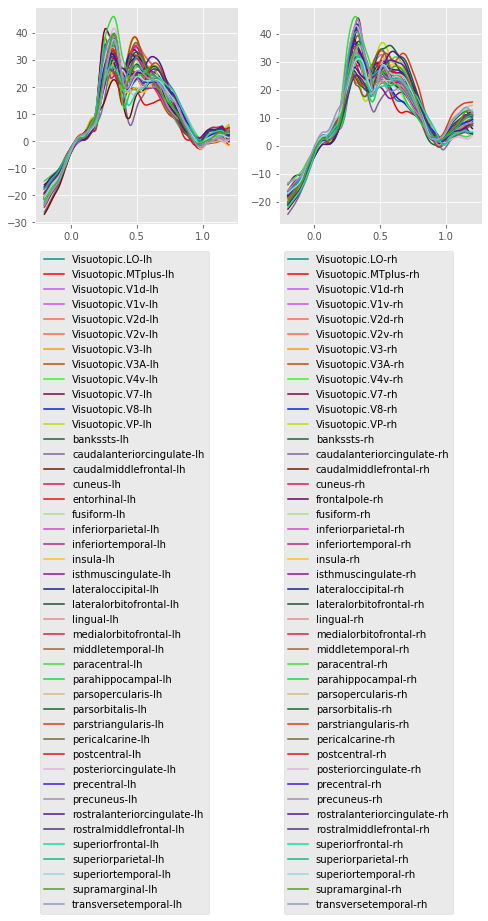

In [7]:
plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

times = stc.times
select_labels = dict()
for name in labels:
    label = labels[name]
    color = label.color
    try:
        stc_inlabel = stc.in_label(label)
    except ValueError:
        continue
    data = stc_inlabel.data
    # print(name, color, data.shape)
    
    sort = sorted(data.ravel(), reverse=True)
    if sort[100] < lims[0]:
        continue
    
    mean_data = np.mean(data, axis=0)
    
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
        
    ax.plot(times, mean_data, c=color, label=name)
    
    select_labels[name] = label

for j in [0, 1]:
    axes[j].legend(loc='upper left', bbox_to_anchor=(0, -0.1))

In [ ]:
surfer_kwargs = dict(hemi='both',
                     clim=dict(kind='value',
                               lims=lims),
                     views='lateral',
                     initial_time=0.3,
                     time_unit='s',
                     size=(800, 800),
                     smoothing_steps=10,
                     subject='fsaverage')

# This can not be operated using VS code
brain = stc.plot(**surfer_kwargs)

for name in select_labels:
    print(name)
    brain.add_label(labels[name], borders=True)

mlab.show()

Visuotopic.LO-lh
Visuotopic.LO-rh
Visuotopic.MTplus-lh
Visuotopic.MTplus-rh
Visuotopic.V1d-lh
Visuotopic.V1d-rh
Visuotopic.V1v-lh
Visuotopic.V1v-rh
Visuotopic.V2d-lh
Visuotopic.V2d-rh
Visuotopic.V2v-lh
Visuotopic.V2v-rh
Visuotopic.V3-lh
Visuotopic.V3-rh
Visuotopic.V3A-lh
Visuotopic.V3A-rh
Visuotopic.V4v-lh
Visuotopic.V4v-rh
Visuotopic.V7-lh
Visuotopic.V7-rh
Visuotopic.V8-lh
Visuotopic.V8-rh
Visuotopic.VP-lh
Visuotopic.VP-rh
bankssts-lh
bankssts-rh
caudalanteriorcingulate-lh
caudalanteriorcingulate-rh
caudalmiddlefrontal-lh
caudalmiddlefrontal-rh
cuneus-lh
cuneus-rh
entorhinal-lh
frontalpole-rh
fusiform-lh
fusiform-rh
inferiorparietal-lh
inferiorparietal-rh
inferiortemporal-lh
inferiortemporal-rh
insula-lh
insula-rh
isthmuscingulate-lh
isthmuscingulate-rh
lateraloccipital-lh
lateraloccipital-rh
lateralorbitofrontal-lh
lateralorbitofrontal-rh
lingual-lh
lingual-rh
medialorbitofrontal-lh
medialorbitofrontal-rh
middletemporal-lh
middletemporal-rh
paracentral-lh
paracentral-rh
parahippocamp